In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\python\\customer_purchase_behaviour\\customer_data.csv")

In [3]:
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [5]:
df.drop(columns=["id"],inplace=True)

In [6]:
df.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [7]:
df["age"].describe()
# AVG Age of customers - 30
# MIN Age - 12
# MAX Age - 49
# 25% of the customers are of age 12 - 27
# 50% of the customers are of age 27 - 33
# 75% of the customers are of age 33 - 49

count    100000.000000
mean         30.003260
std           4.480535
min          12.000000
25%          27.000000
50%          30.000000
75%          33.000000
max          49.000000
Name: age, dtype: float64

In [8]:
avg_income_by_age = df.groupby("age").income.mean().reset_index()
avg_income_by_age = avg_income_by_age.sort_values(by='age')
avg_income_by_age.head(10)

,age,income
0,12,23832.666667
1,13,33677.250000
2,14,27895.923077
3,15,26299.846154
4,16,31760.363636
5,17,28478.223776
6,18,26840.218884
7,19,29078.065646
8,20,28082.550471
9,21,27397.879528


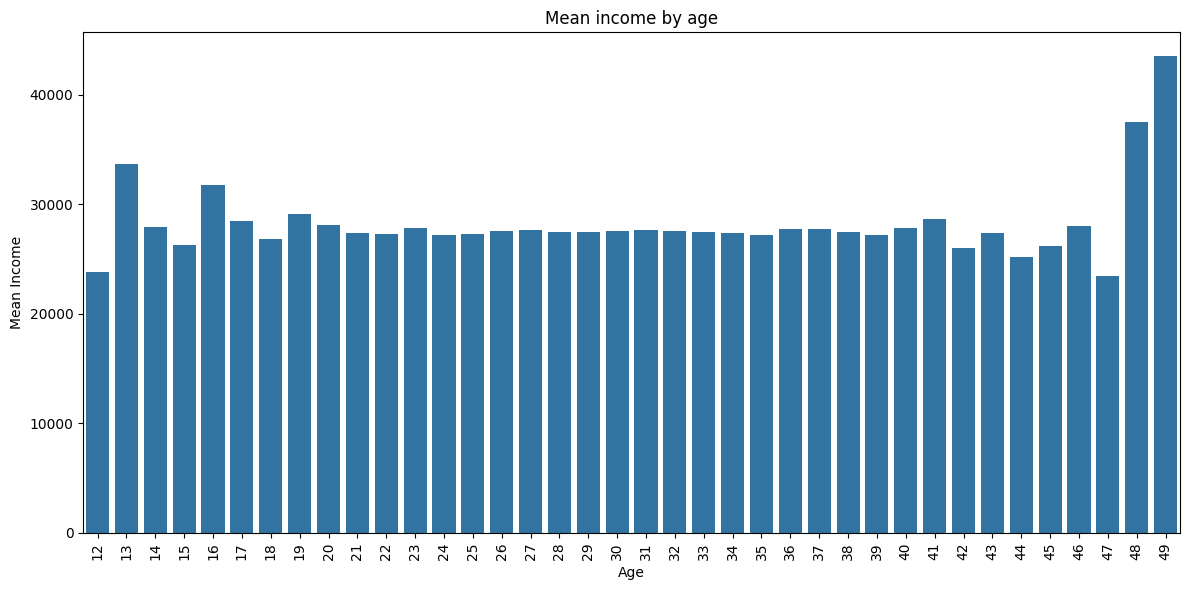

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='income', data=avg_income_by_age)
plt.title('Mean income by age')
plt.xlabel('Age')
plt.ylabel('Mean Income')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

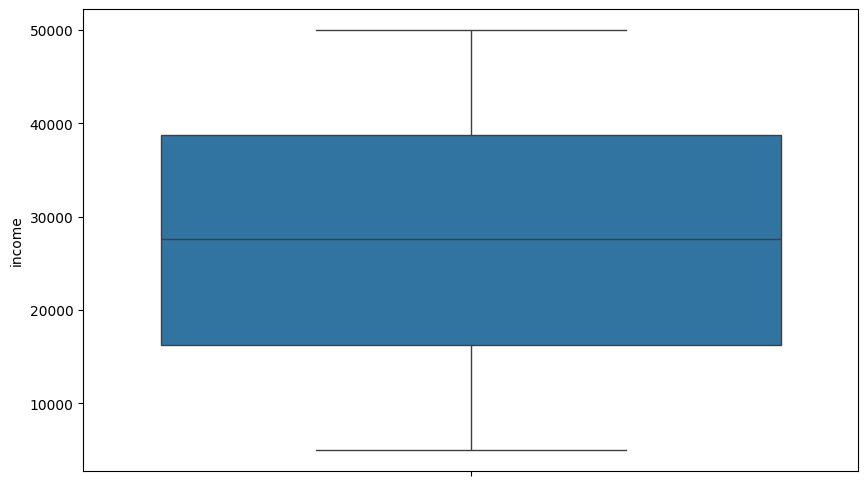

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(df["income"])
plt.show()
# No outliers

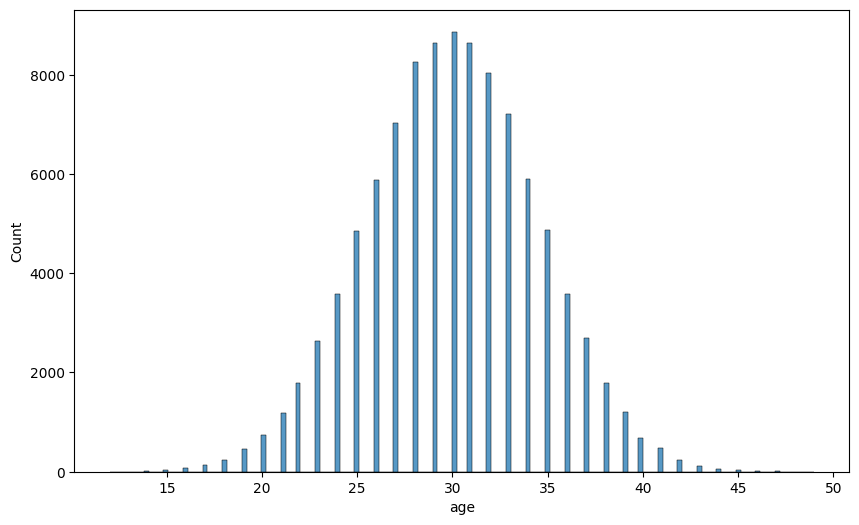

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df["age"])
plt.show()
# A bell curve indicates that the data is Normally distributed

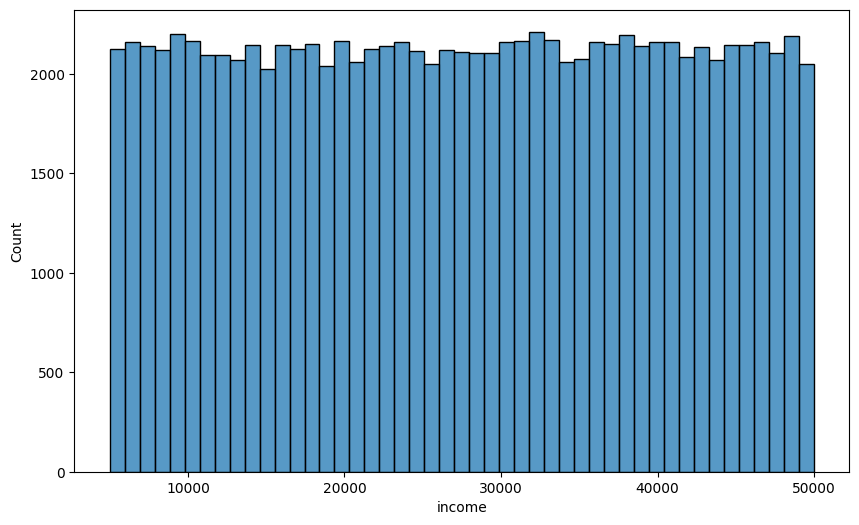

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df["income"])
plt.show()

In [13]:
# education column

In [14]:
df["education"].value_counts()

education
College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: count, dtype: int64

In [15]:
df.groupby("education").income.mean().sort_values()
# There is no such relationship between income and education everyone earns the same 

education
HighSchool    27423.473616
Masters       27470.785452
College       27544.391333
Bachelor      27555.371644
Name: income, dtype: float64

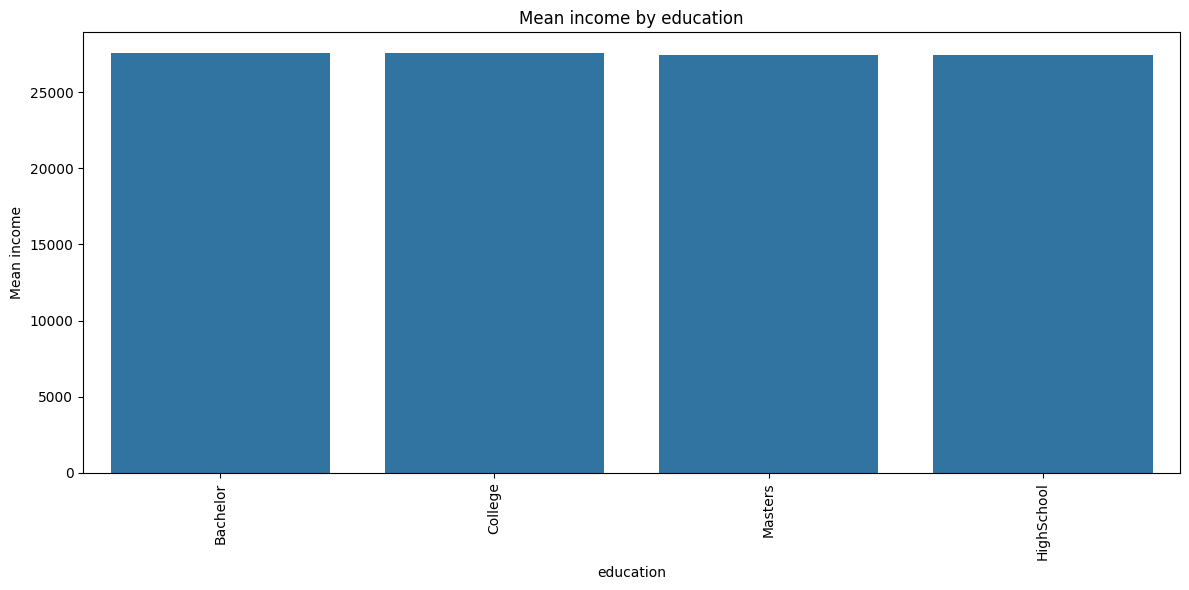

In [16]:
mean_income = df.groupby('education').income.mean().reset_index().head(10)
mean_income_sorted = mean_income.sort_values(by='income', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='education', y='income', data=mean_income_sorted)
plt.title('Mean income by education')
plt.xlabel('education')
plt.ylabel('Mean income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
df.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [18]:
# Gender 

In [19]:
df["gender"].value_counts()

gender
Female    50074
Male      49926
Name: count, dtype: int64

In [20]:
income_by_gender = df.groupby("gender").income.mean()
income_by_gender

gender
Female    27507.945441
Male      27524.618996
Name: income, dtype: float64

In [21]:
# Region

In [22]:
df["region"].value_counts()

region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64

In [23]:
age_by_region = df.groupby("region").age.mean().reset_index().sort_values(by="age")
age_by_region

,region,age
3,West,29.960114
2,South,29.976287
0,East,30.037175
1,North,30.044081


In [24]:
# AVG income by region

In [25]:
income_by_region = df.groupby("region").income.mean().reset_index().sort_values(by="income")
income_by_region

,region,income
3,West,27411.793686
0,East,27467.802853
2,South,27591.942460
1,North,27670.206848


In [26]:
df.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [27]:
# loyalty_status vs the region

In [28]:
age_by_region = df.groupby("loyalty_status").income.mean().reset_index().sort_values(by="income")
age_by_region

,loyalty_status,income
0,Gold,27434.735401
2,Silver,27492.881157
1,Regular,27541.343011


In [29]:
# loyalty_status and purchase_frequency

In [30]:
purchase_by_loyalty = df.groupby("loyalty_status")["purchase_frequency"].value_counts()
purchase_by_loyalty

loyalty_status  purchase_frequency
Gold            rare                   4974
                occasional             2932
                frequent               1992
Regular         rare                  30112
                occasional            18037
                frequent              11989
Silver          rare                  14933
                occasional             8917
                frequent               6114
Name: count, dtype: int64

In [31]:
# product_category

In [32]:
avg_purchase_amount_by_product = df.groupby("product_category").purchase_amount.mean().reset_index().sort_values(by="purchase_amount")
avg_purchase_amount_by_product

,product_category,purchase_amount
6,Home,9538.173262
1,Books,9592.935678
5,Health,9610.963647
2,Clothing,9634.595327
3,Electronics,9648.226696
4,Food,9669.953110
0,Beauty,9721.366038


<Figure size 1200x600 with 0 Axes>

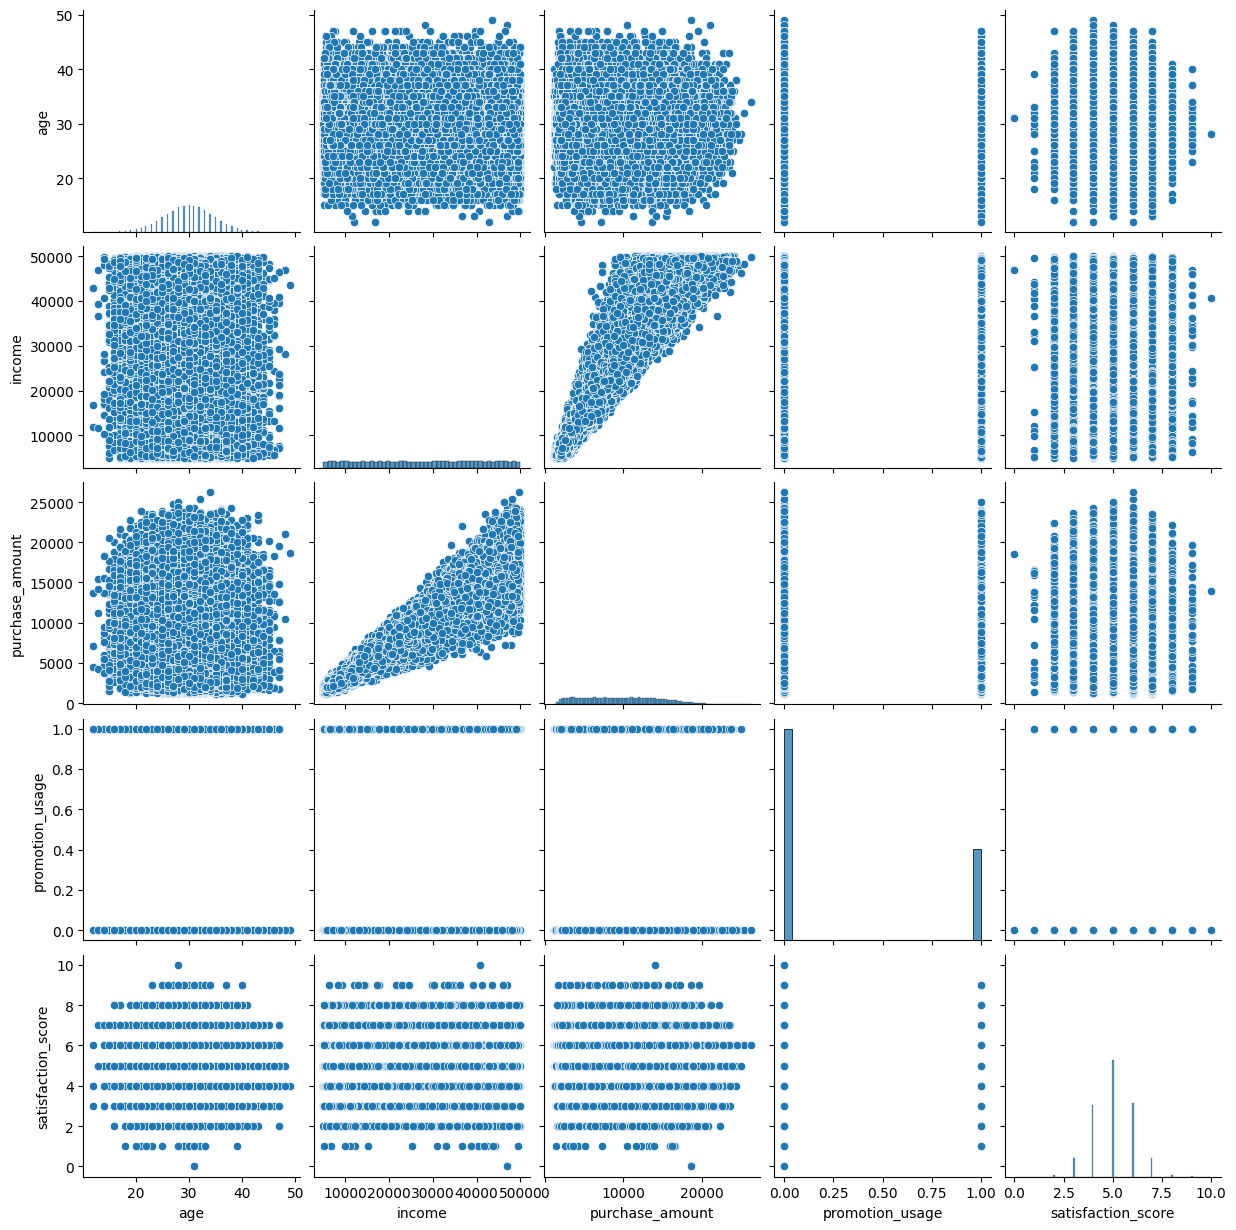

In [33]:
plt.figure(figsize=(12,6))
sns.pairplot(df)
plt.show()

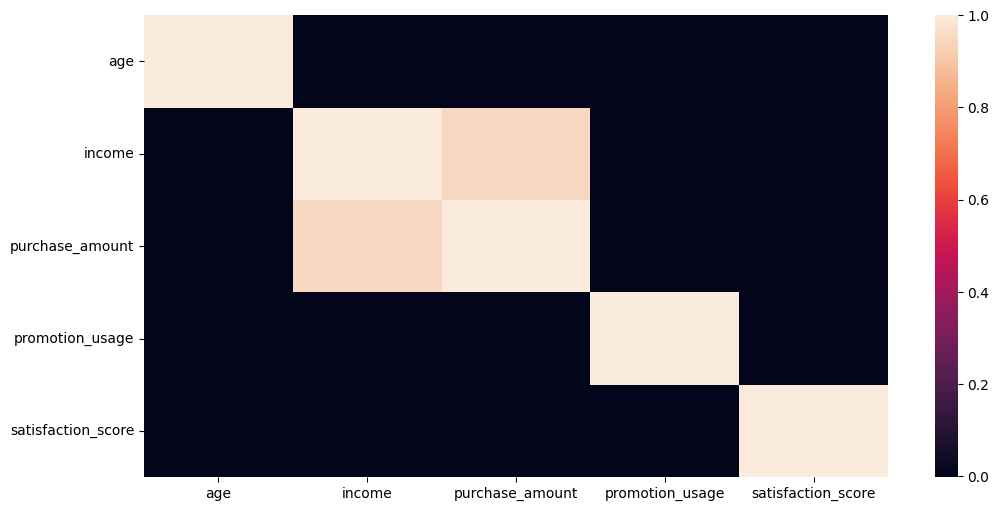

In [34]:
num_cols = df.select_dtypes(["int","float","int64"])
plt.figure(figsize=(12,6))
sns.heatmap(num_cols.corr())
plt.show()

In [35]:
# we can see that this data doesn't have much relationship between them 
# only purchase amount and income have some relation

In [36]:
df.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [37]:
# relationship between purchase amount and income

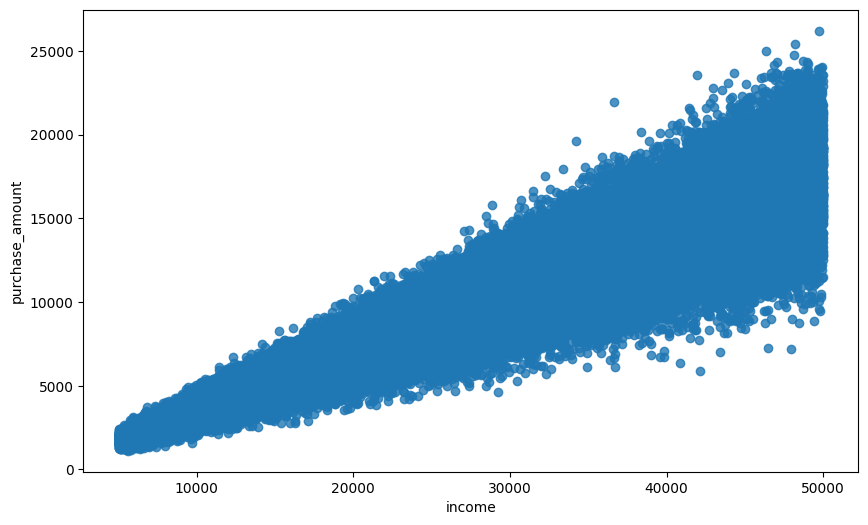

In [38]:
plt.figure(figsize=(10,6))
sns.regplot(x=df["income"],y=df["purchase_amount"])
plt.show()

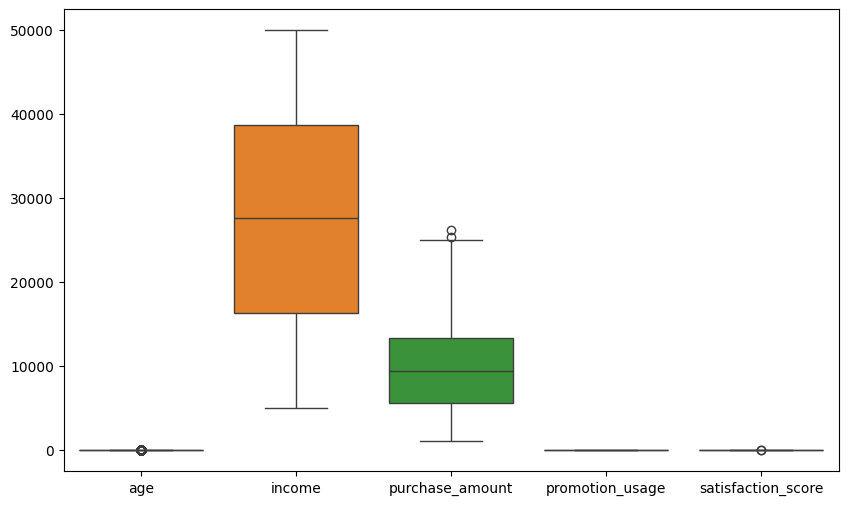

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

In [40]:
# model

In [41]:
df.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [42]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
numerical_columns = ["income","purchase_amount"]
df[numerical_columns] = sc.fit_transform(df[numerical_columns])

In [43]:
df.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,Male,0.792933,Bachelor,East,Gold,frequent,0.682891,Books,0,6
1,29,Male,0.229267,Masters,West,Regular,rare,0.137088,Clothing,1,6
2,37,Male,0.752200,Bachelor,West,Silver,rare,0.426692,Clothing,0,6
3,30,Male,0.145956,HighSchool,South,Regular,frequent,0.118791,Food,0,7
4,31,Female,0.932267,College,North,Regular,occasional,0.740134,Clothing,1,5


In [44]:
df['gender'] = df['gender'].astype('category')
df = pd.get_dummies(df, columns=['gender'], prefix='gender')

In [45]:
df.head()

,age,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,gender_Female,gender_Male
0,27,0.792933,Bachelor,East,Gold,frequent,0.682891,Books,0,6,False,True
1,29,0.229267,Masters,West,Regular,rare,0.137088,Clothing,1,6,False,True
2,37,0.752200,Bachelor,West,Silver,rare,0.426692,Clothing,0,6,False,True
3,30,0.145956,HighSchool,South,Regular,frequent,0.118791,Food,0,7,False,True
4,31,0.932267,College,North,Regular,occasional,0.740134,Clothing,1,5,True,False


In [46]:
df['region'] = df['region'].astype('category')
df = pd.get_dummies(df, columns=['region'], prefix='region')

In [47]:
df['education'] = df['education'].astype('category')
df = pd.get_dummies(df, columns=['education'], prefix='education')

In [48]:
df['loyalty_status'] = df['loyalty_status'].astype('category')
df = pd.get_dummies(df, columns=['loyalty_status'], prefix='loyalty_status')

In [49]:
df.head()

,age,income,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,gender_Female,gender_Male,region_East,region_North,region_South,region_West,education_Bachelor,education_College,education_HighSchool,education_Masters,loyalty_status_Gold,loyalty_status_Regular,loyalty_status_Silver
0,27,0.792933,frequent,0.682891,Books,0,6,False,True,True,False,False,False,True,False,False,False,True,False,False
1,29,0.229267,rare,0.137088,Clothing,1,6,False,True,False,False,False,True,False,False,False,True,False,True,False
2,37,0.752200,rare,0.426692,Clothing,0,6,False,True,False,False,False,True,True,False,False,False,False,False,True
3,30,0.145956,frequent,0.118791,Food,0,7,False,True,False,False,True,False,False,False,True,False,False,True,False
4,31,0.932267,occasional,0.740134,Clothing,1,5,True,False,False,True,False,False,False,True,False,False,False,True,False


In [50]:
df['purchase_frequency'] = df['purchase_frequency'].astype('category')
df = pd.get_dummies(df, columns=['purchase_frequency'], prefix='purchase_frequency')

In [51]:
df['product_category'] = df['product_category'].astype('category')
df = pd.get_dummies(df, columns=['product_category'], prefix='product_category')

In [52]:
df.head()

,age,income,purchase_amount,promotion_usage,satisfaction_score,gender_Female,gender_Male,region_East,region_North,region_South,...,purchase_frequency_frequent,purchase_frequency_occasional,purchase_frequency_rare,product_category_Beauty,product_category_Books,product_category_Clothing,product_category_Electronics,product_category_Food,product_category_Health,product_category_Home
0,27,0.792933,0.682891,0,6,False,True,True,False,False,...,True,False,False,False,True,False,False,False,False,False
1,29,0.229267,0.137088,1,6,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,37,0.752200,0.426692,0,6,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
3,30,0.145956,0.118791,0,7,False,True,False,False,True,...,True,False,False,False,False,False,False,True,False,False
4,31,0.932267,0.740134,1,5,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False


In [53]:
df.isna().sum()

age                              0
income                           0
purchase_amount                  0
promotion_usage                  0
satisfaction_score               0
gender_Female                    0
gender_Male                      0
region_East                      0
region_North                     0
region_South                     0
region_West                      0
education_Bachelor               0
education_College                0
education_HighSchool             0
education_Masters                0
loyalty_status_Gold              0
loyalty_status_Regular           0
loyalty_status_Silver            0
purchase_frequency_frequent      0
purchase_frequency_occasional    0
purchase_frequency_rare          0
product_category_Beauty          0
product_category_Books           0
product_category_Clothing        0
product_category_Electronics     0
product_category_Food            0
product_category_Health          0
product_category_Home            0
dtype: int64

In [54]:
df.shape

(100000, 28)

Linear Regression - MSE: 0.008399834303790824, R2 Score: 0.8989503151101322


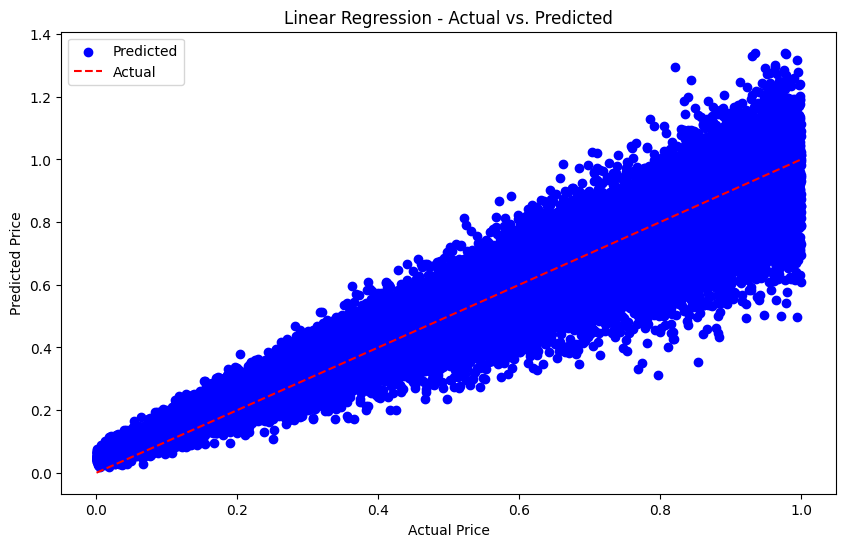

Ridge Regression - MSE: 0.008399364412375165, R2 Score: 0.8989559678858619


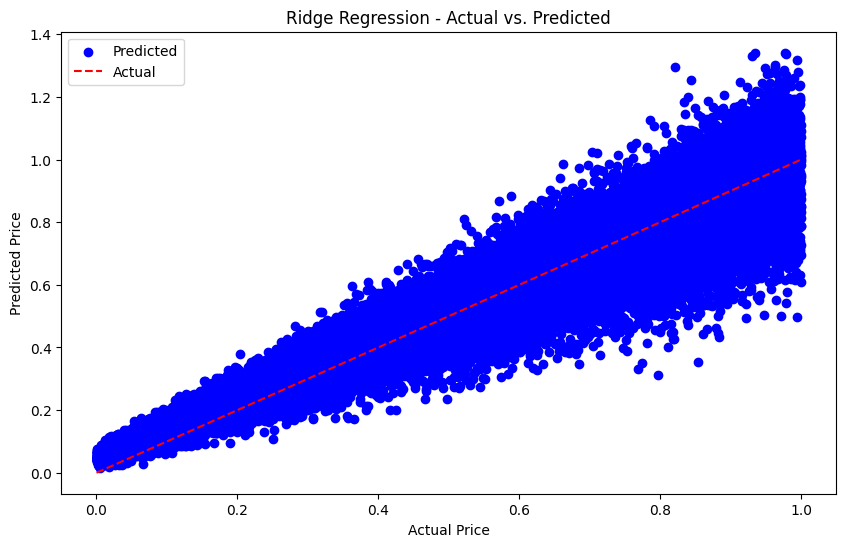

Decision Tree - MSE: 0.014609825591604939, R2 Score: 0.8242443578129457


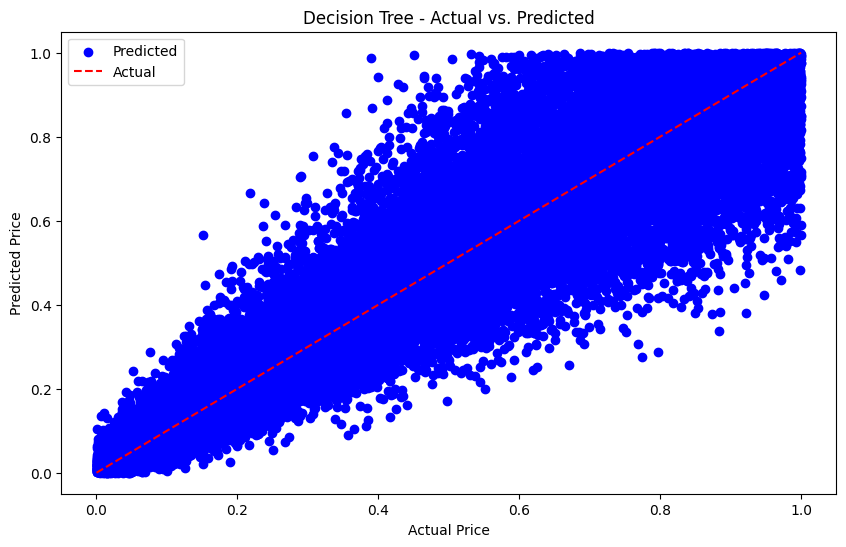

Random Forest - MSE: 0.00732614681447089, R2 Score: 0.9118667344753344


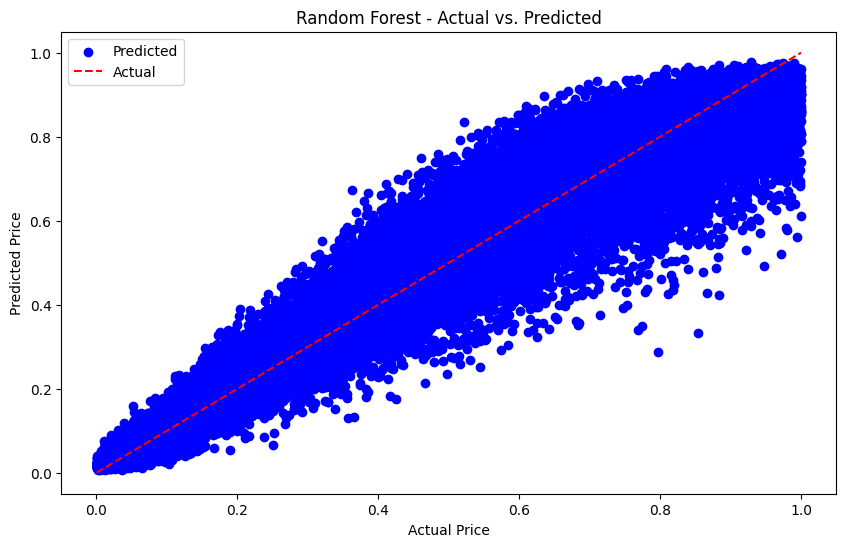

Gradient Boosting - MSE: 0.006861624100823929, R2 Score: 0.9174549249253564


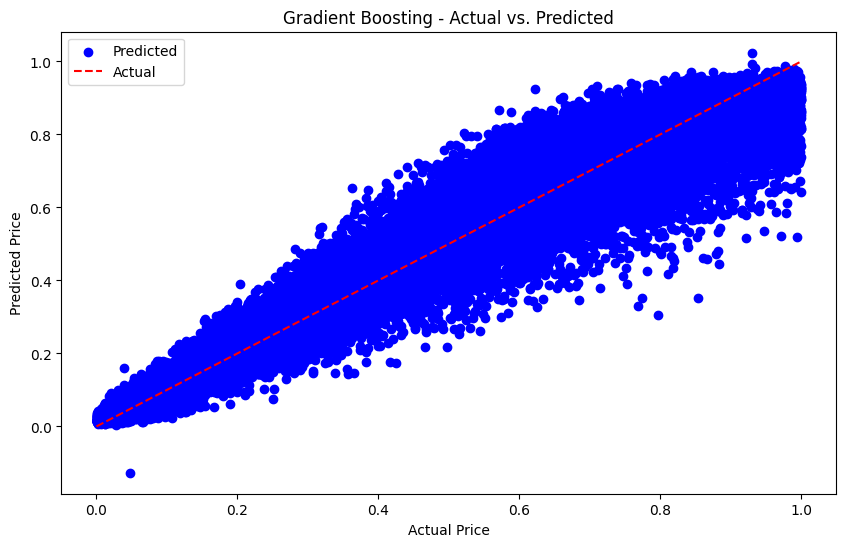

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=['income'])
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=1000),

}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse}, R2 Score: {r2}")
    
    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
    plt.title(f"{name} - Actual vs. Predicted")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.show()
